In [4]:
# Import `datasets` from `sklearn`
from sklearn import datasets
import numpy as np
# Load in the `digits` data
digits = datasets.load_digits()

# Print the `digits` data 
print(digits)

{'data': array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ..

In [2]:
# Get the keys of the `digits` data
print(digits.keys())

# Print out the data
print(digits.data)

# Print out the target values
print(digits.target)

# Print out the description of the `digits` data
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmap

In [5]:
# Isolate the `digits` data
digits_data = digits.data

# Inspect the shape
print(digits_data.shape)

# Isolate the target values with `target`
digits_target = digits.target

# Inspect the shape
print(digits_target.shape)

# Print the number of unique labels
number_digits = len(np.unique(digits.target))

# Isolate the `images`
digits_images = digits.images

# Inspect the shape
print(digits_images.shape)

(1797, 64)
(1797,)
(1797, 8, 8)


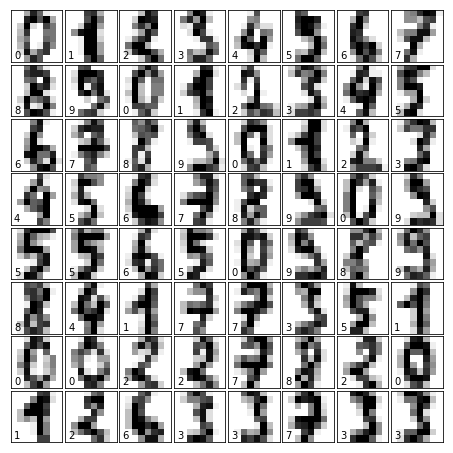

In [7]:
import matplotlib.pyplot as plt
# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

In [13]:
from sklearn.decomposition import RandomizedPCA
# Create a Randomized PCA model that takes two components
randomized_pca = RandomizedPCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

[[ -1.25411069  21.27639194]
 [  7.9675407  -20.76275898]
 [  6.97823642  -9.95785618]
 ..., 
 [ 10.80078577  -6.95913384]
 [ -4.84612127  12.44272545]
 [ -0.34848012   6.36385144]]
[[ -1.25946664  21.27488792]
 [  7.95761456 -20.76868769]
 [  6.99192222  -9.9559948 ]
 ..., 
 [ 10.80128773  -6.96024659]
 [ -4.87210174  12.42394536]
 [ -0.34439132   6.36553869]]


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


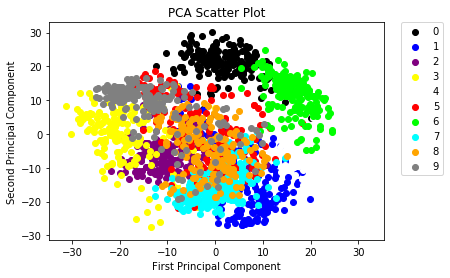

In [14]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()